In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv("classification_base.csv").values

data = dataset[:,:-1]
target = dataset[:,-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, target, test_size=0.3, random_state=21, stratify=target
)

train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)
#creating normal and fraud datasets
normal_train_data = train_data[~train_labels]
normal_test_data = test_data[~test_labels]
fraud_train_data = train_data[train_labels]
fraud_test_data = test_data[test_labels]
print(" No. of records in Normal Train data=",len(normal_train_data))
print(" No. of records in Fraud Test Data=",len(fraud_test_data))
print(" No. of records in Normal Test data=",len(normal_test_data))

 No. of records in Normal Train data= 134371
 No. of records in Fraud Test Data= 9
 No. of records in Normal Test data= 57588


In [2]:
from anomaly_detector import SODA_detector

model = SODA_detector()

model.fit(normal_train_data,3)

In [3]:
result = model.predict(test_data)


Executing Data Partition...
[--------------------------------------------------] 100.00% - 5 of 5  cloud_member_recruitment_njit_njit

In [4]:
result.shape

(57597,)

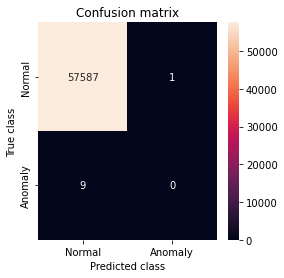

 Accuracy:  0.49999131763561855
 Recall:  0.0
 Precision:  0.0


In [7]:
from sklearn.metrics import confusion_matrix, recall_score, balanced_accuracy_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

LABELS = ["Normal","Anomaly"]

conf_matrix = confusion_matrix(test_labels, result)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
# print Accuracy, precision and recall
print(" Accuracy: ",balanced_accuracy_score(test_labels, result))
print(" Recall: ",recall_score(test_labels, result))
print(" Precision: ",precision_score(test_labels, result))

In [7]:
pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
Note: you may need to restart the kernel to use updated packages.
